In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

In [2]:
green_data = pd.read_csv('./green.csv')
hinselmann_data = pd.read_csv('./hinselmann.csv')
schiller_data = pd.read_csv('./schiller.csv')

data = [[green_data,'green_data'], [hinselmann_data,'hinselmann_data'], [schiller_data,'schiller_data']]

In [3]:
def balance_dataset(dataset, classe):
    y = dataset[classe]
    X = dataset.drop(columns=[classe])

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

    sm = SMOTE(random_state=2)

    X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())
    
    

    return X_train, X_test, y_train, y_test, X_train_res, y_train_res

In [8]:
X_train, X_test, y_train, y_test, X_train_res, y_train_res = balance_dataset(data[0][0], 'consensus')

param_KNN = dict(n_neighbors=list(range(1, 31)))
knn = KNeighborsClassifier(n_neighbors=13, weights='uniform')
# n_iter controls the number of searches
#scoring -> accuracy or both
rand = RandomizedSearchCV(knn, param_KNN, cv=10, scoring='roc_auc', n_iter=20, random_state=5, return_train_score=False)
rand.fit(X_train_res, y_train_res.ravel())
pd.DataFrame(rand.cv_results_)[['mean_test_score', 'std_test_score', 'params']]


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,mean_test_score,std_test_score,params
0,0.869565,0.089824,{'n_neighbors': 12}
1,0.604891,0.155863,{'n_neighbors': 30}
2,0.665217,0.111539,{'n_neighbors': 24}
3,0.626087,0.141537,{'n_neighbors': 26}
4,0.730435,0.098592,{'n_neighbors': 19}
5,0.875000,0.075909,{'n_neighbors': 11}
6,0.940761,0.065728,{'n_neighbors': 3}
7,0.834239,0.104190,{'n_neighbors': 14}
8,0.628261,0.135023,{'n_neighbors': 27}
9,0.690761,0.114218,{'n_neighbors': 22}


In [7]:
param_RF = dict(n_estimators=[500,600,700,800,900,1000,1100,1200,1300,1400,1500], max_depth=list(range(4, 20)))
clf_RF = RandomForestClassifier()

rand_RF = RandomizedSearchCV(clf_RF, param_RF, cv=10, scoring='accuracy', 
                             n_iter=10, random_state=5, return_train_score=False)

rand_RF.fit(X_train_res, y_train_res.ravel())
pd.DataFrame(rand_RF.cv_results_)[['mean_test_score', 'std_test_score', 'params']]



/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


,mean_test_score,std_test_score,params
0,0.978261,0.044419,"{'n_estimators': 1400, 'max_depth': 17}"
1,0.978261,0.044419,"{'n_estimators': 1200, 'max_depth': 7}"
2,0.989130,0.035221,"{'n_estimators': 800, 'max_depth': 4}"
3,0.978261,0.044419,"{'n_estimators': 1100, 'max_depth': 5}"
4,0.978261,0.044419,"{'n_estimators': 700, 'max_depth': 15}"
5,0.978261,0.044419,"{'n_estimators': 700, 'max_depth': 9}"
6,0.978261,0.044419,"{'n_estimators': 1500, 'max_depth': 12}"
7,0.978261,0.044419,"{'n_estimators': 1100, 'max_depth': 7}"
8,0.978261,0.044419,"{'n_estimators': 900, 'max_depth': 12}"
9,0.978261,0.044419,"{'n_estimators': 1300, 'max_depth': 13}"


In [14]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [15]:
#dataset balenced
clf_RF = RandomForestClassifier(n_estimators=800, max_depth=4)

clf_RF.fit(X_train_res, y_train_res.ravel())
    
predicted = clf_RF.predict(X_test)
conf_matrix = confusion_matrix(y_test, predicted.ravel())


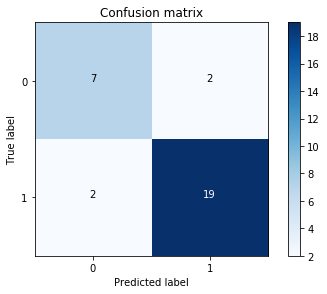

In [17]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(conf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [20]:
#dataset unbalanced
clf_RF_un = RandomForestClassifier(n_estimators=800, max_depth=4)

clf_RF_un.fit(X_train, y_train)
    
predicted_un = clf_RF_un.predict(X_test)
conf_matrix_un = confusion_matrix(y_test, predicted_un)

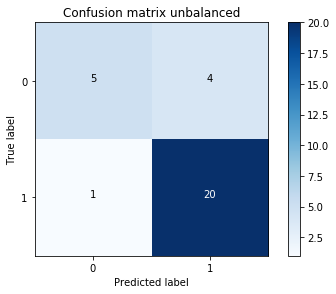

In [21]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(conf_matrix_un , classes=class_names, title='Confusion matrix unbalanced')
plt.show()